## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore")

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [48]:
df = pd.read_csv('titanic.csv', sep=',', index_col = 0)

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [49]:
df.shape

(891, 11)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [51]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

По кожному атрибуту визначено таку кількість пропущених значень:


1.   Вік - 177 пропущених значень
2.   Каюта - 687 пропущених значень



***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



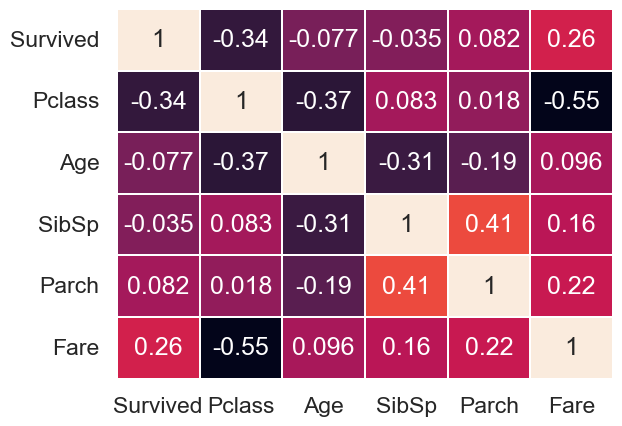

In [52]:
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=0.3, cbar=False)
plt.show()

Ваші висновки:


Найбільший коефіцієнт кореляції - 0.41, найменший коефіцієнт кореляції - 0.55 



**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [53]:
def dataFrameCleaning(ds, attribute, listWithSomeAttributes):
    listWithSomeAttributes.append(attribute)

    for x in listWithSomeAttributes:
        
        if ds[x].dtypes == object:
            ds[x].replace(np.nan, ds[x].value_counts().idxmax(), inplace = True)
            
        if ds[x].dtypes == float or df[x].dtype == int:
            ds[x].replace(np.nan, ds[x].median(), inplace = True)
            
    return ds
dataFrameCleaning(df, "Cabin", ['Age', "Embarked"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


Ваші висновки:

Щоб позбавитися пропусків ми використаєли заповнення пропущених значень медіаною за групами, отже пропущені значення були замінені на середні значення із своєї категорії. 




 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





In [54]:
age_category = pd.cut(df.Age, bins=[0,16,32,48,64,80], labels=['0','1','2','3','4'])
df.insert(6, 'Age_bin', age_category)

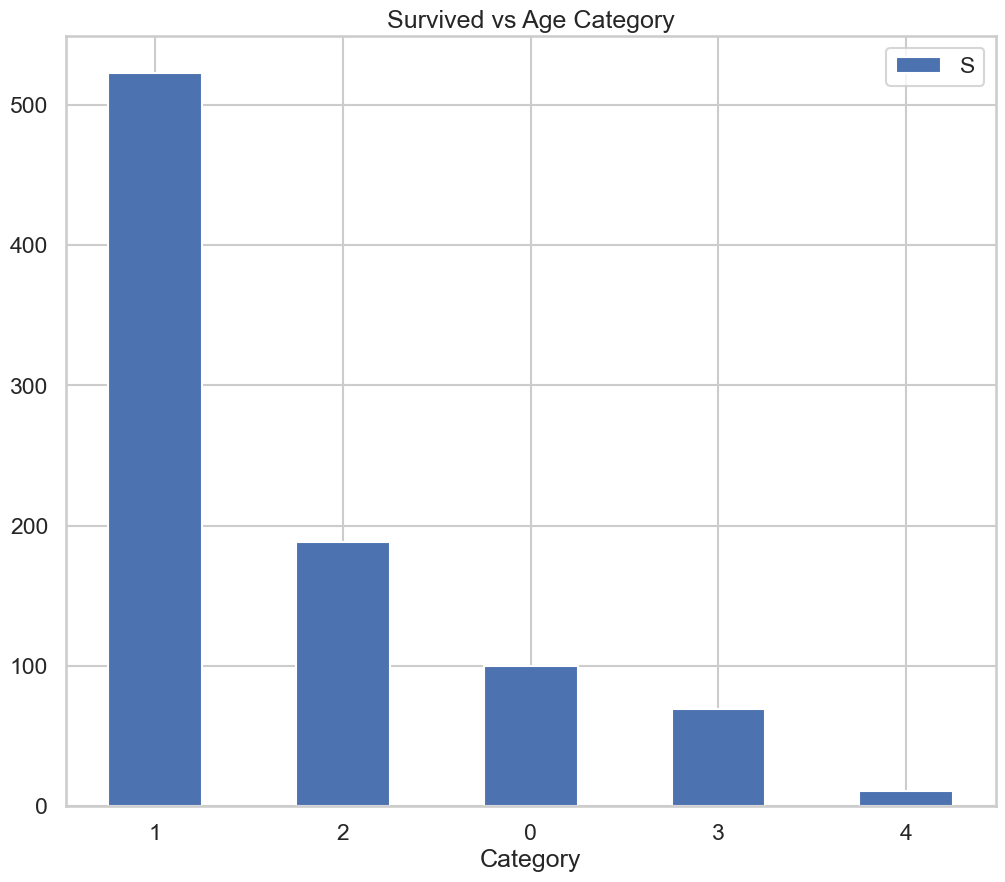

In [55]:
plt.figure(figsize=(12,10))

plt.bar(df['Age_bin'].value_counts().index.array, df['Age_bin'].value_counts().array, width= 0.5)

plt.xlabel("Category")
plt.title("Survived vs Age Category")
plt.legend("Survived")

plt.show()

Ваші висновки:


1.   Найвища смертність в 1 категорії
2.   Найнижча смертність в 4 категорії



***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [63]:
df['Fare_bin'] = pd.qcut(df['Fare'], 4)
df[['Fare_bin', 'Survived']].groupby(['Fare_bin'], as_index=False).sum()

,Fare_bin,Survived
0,"(-0.001, 7.91]",44
1,"(7.91, 14.454]",68
2,"(14.454, 31.0]",101
3,"(31.0, 512.329]",129


Ваші висновки:


Відношення вартості білету до виживших пасажирів.



***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [13]:
family_size = df["SibSp"] + df["Parch"]
df.insert(9, 'Family_size', family_size)

In [14]:
df.insert(10, 'Alone', 1*(np.array(df.Family_size)==0))

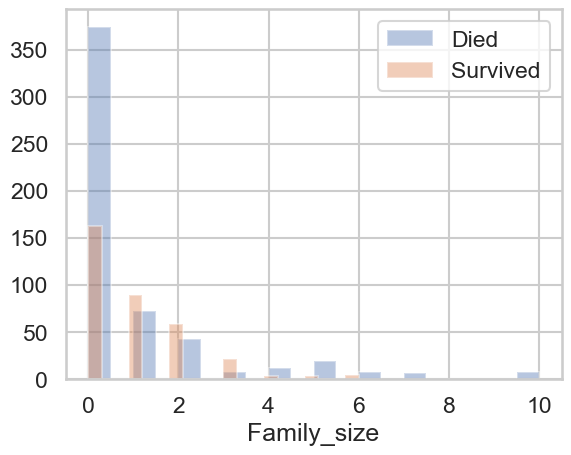

In [15]:
sns.distplot(df[df['Survived']==0].Family_size, bins=20, kde=False, label='Died')
sns.distplot(df[df['Survived']==1].Family_size, bins=20, kde=False, label='Survived')

plt.legend()

plt.show()

Ваші висновки:

Проаналіщувавши змінні Family_size та Alone можна сказати, що виживших сімей більше ніж пасажирів, які були самі. 

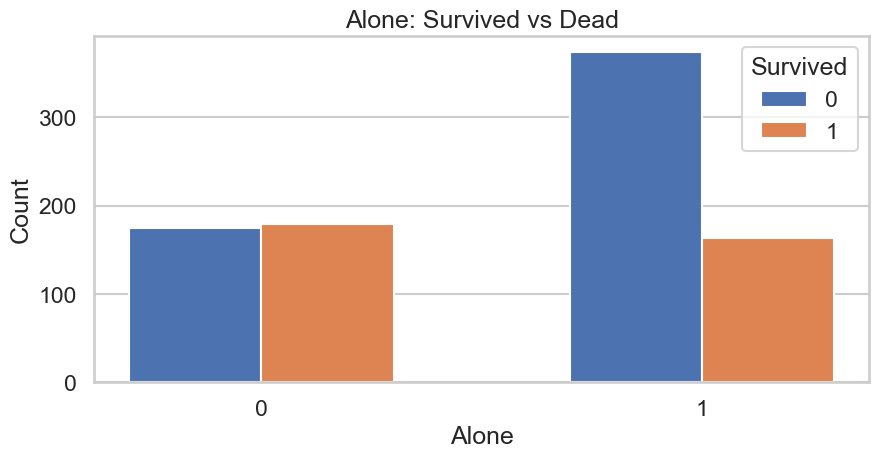

In [24]:
plt.figure(figsize=(10,4.5))
barWidth = 0.3

surv = [df.loc[df['Alone'] == 0, "Survived"].value_counts().get(0),
        df.loc[df['Alone'] == 1, "Survived"].value_counts().get(0)]

dead = [df.loc[df['Alone'] == 0, "Survived"].value_counts().get(1),
       df.loc[df['Alone'] == 1, "Survived"].value_counts().get(1)]

r1 = np.arange(len(surv))
r2 = [x + barWidth for x in r1]

plt.bar(r1, surv, width = barWidth, label='0')
plt.bar(r2, dead, width = barWidth, label='1')

plt.xlabel('Alone')
plt.ylabel('Count')

plt.grid(axis='x')
plt.title('Alone: Survived vs Dead')

plt.xticks([r + barWidth/2 for r in range(len(surv))], [0, 1])
plt.legend(title = "Survived")
plt.show()

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [64]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Age_bin,Parch,Ticket,Fare,Cabin,Fare_bin,Embarked
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,0,A/5 21171,7.2500,B96 B98,"(-0.001, 7.91]",S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,2,0,PC 17599,71.2833,C85,"(31.0, 512.329]",C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,1,0,STON/O2. 3101282,7.9250,B96 B98,"(7.91, 14.454]",S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,2,0,113803,53.1000,C123,"(31.0, 512.329]",S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,2,0,373450,8.0500,B96 B98,"(7.91, 14.454]",S


In [67]:
cdf = df.drop(['Ticket', 'Cabin'], axis = 1)
cdf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Age_bin,Parch,Fare,Fare_bin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,0,7.2500,"(-0.001, 7.91]",S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,2,0,71.2833,"(31.0, 512.329]",C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,1,0,7.9250,"(7.91, 14.454]",S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,2,0,53.1000,"(31.0, 512.329]",S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,2,0,8.0500,"(7.91, 14.454]",S


Ваші висновки:

Видаляємо тікет, оскільки ці дані ми ніяк не можемо проаналізувати. Та каюту, оскільки багато пропусків.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [69]:
df['Sex'].replace(['male','female'],[0, 1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2], inplace=True)

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



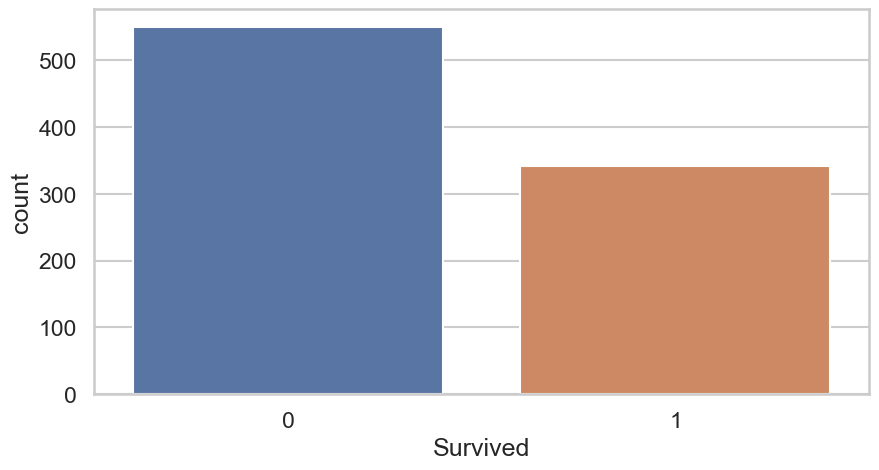

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x="Survived", data=df)

plt.show()

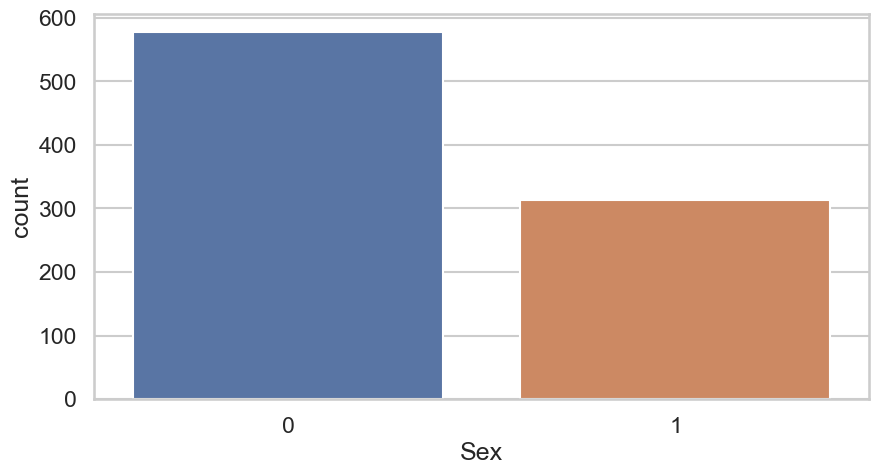

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x="Sex", data=df)
plt.show()

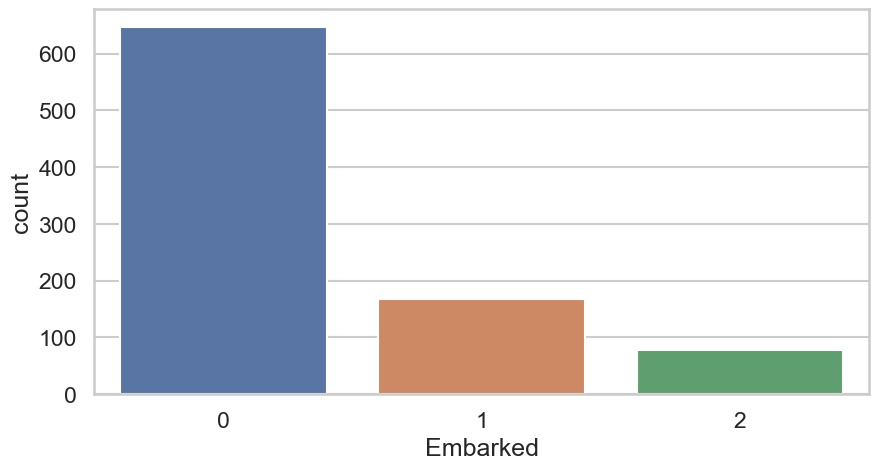

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x="Embarked", data=df)
plt.show()

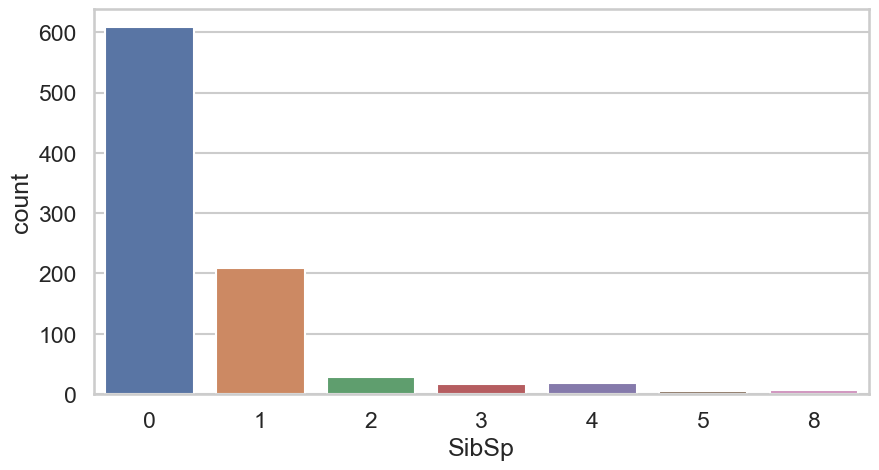

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="SibSp", data=df)
plt.show()

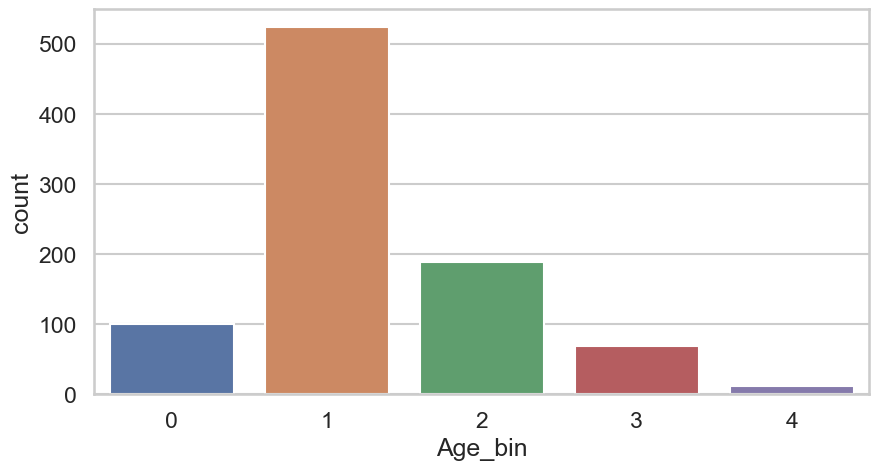

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x="Age_bin", data=df)
plt.show()

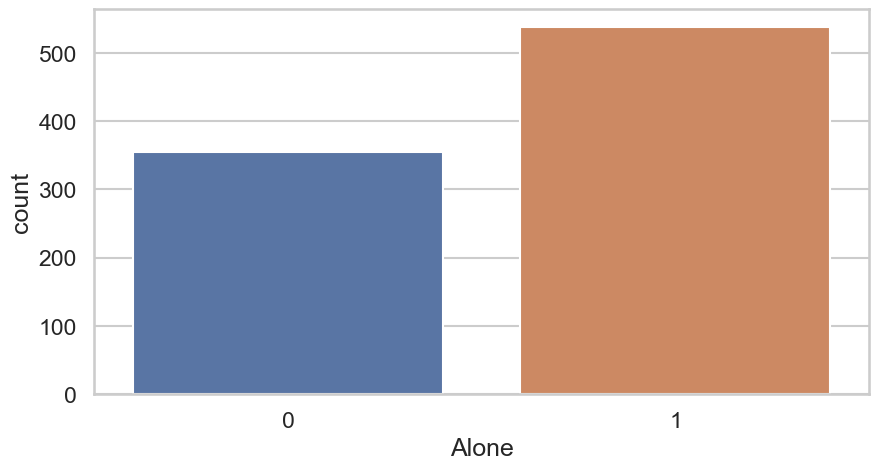

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x="Alone", data=df)
plt.show()

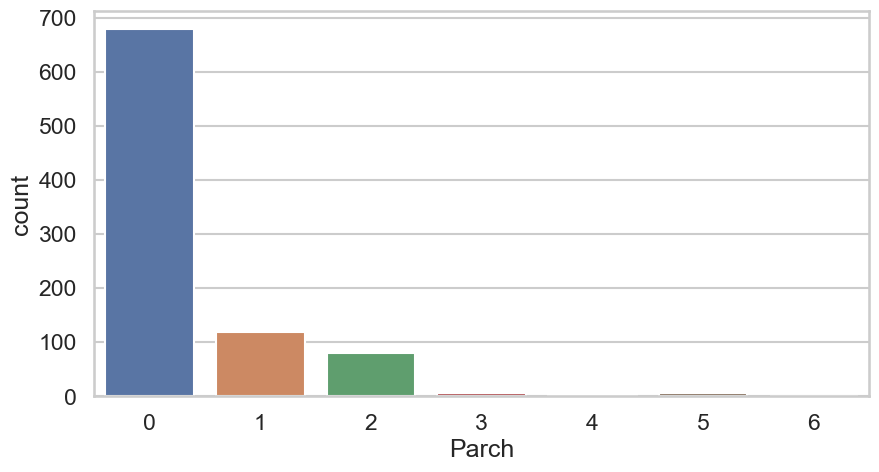

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x="Parch", data=df)
plt.show()

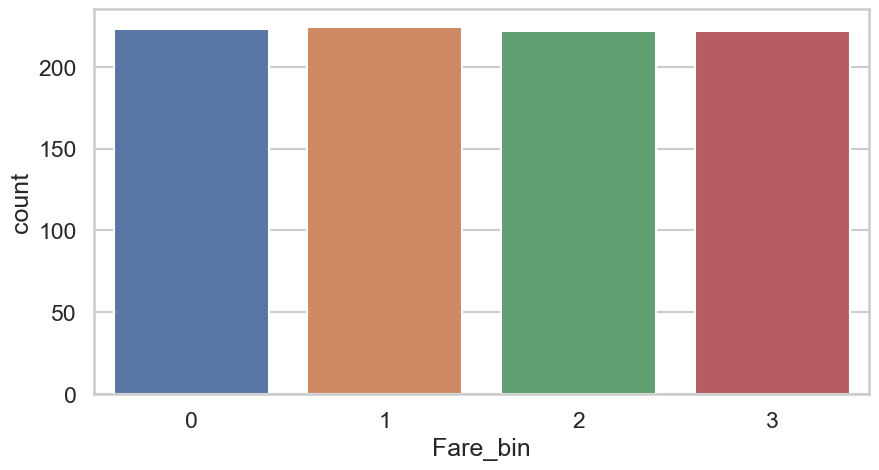

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x="Fare_bin", data=df)
plt.show()

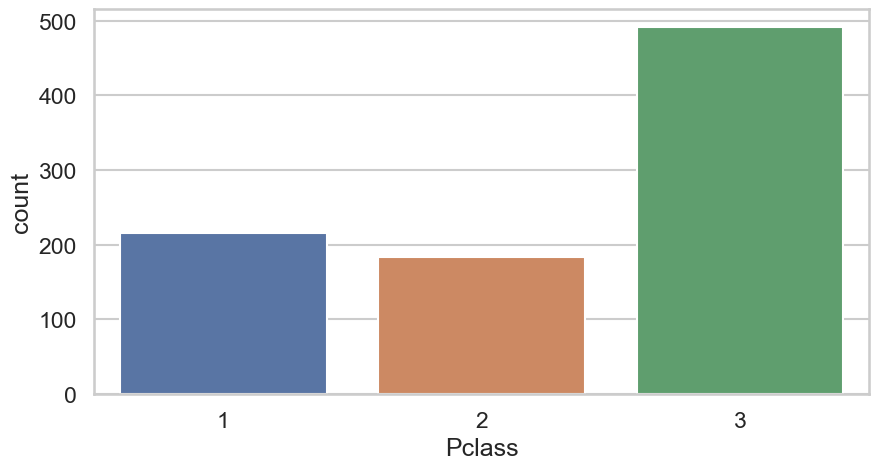

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x="Pclass", data=df)
plt.show()

Ваші висновки:

Як ми можемо помітити, найчастіше використовуються коефіцієнти 0,1,2 та 3.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

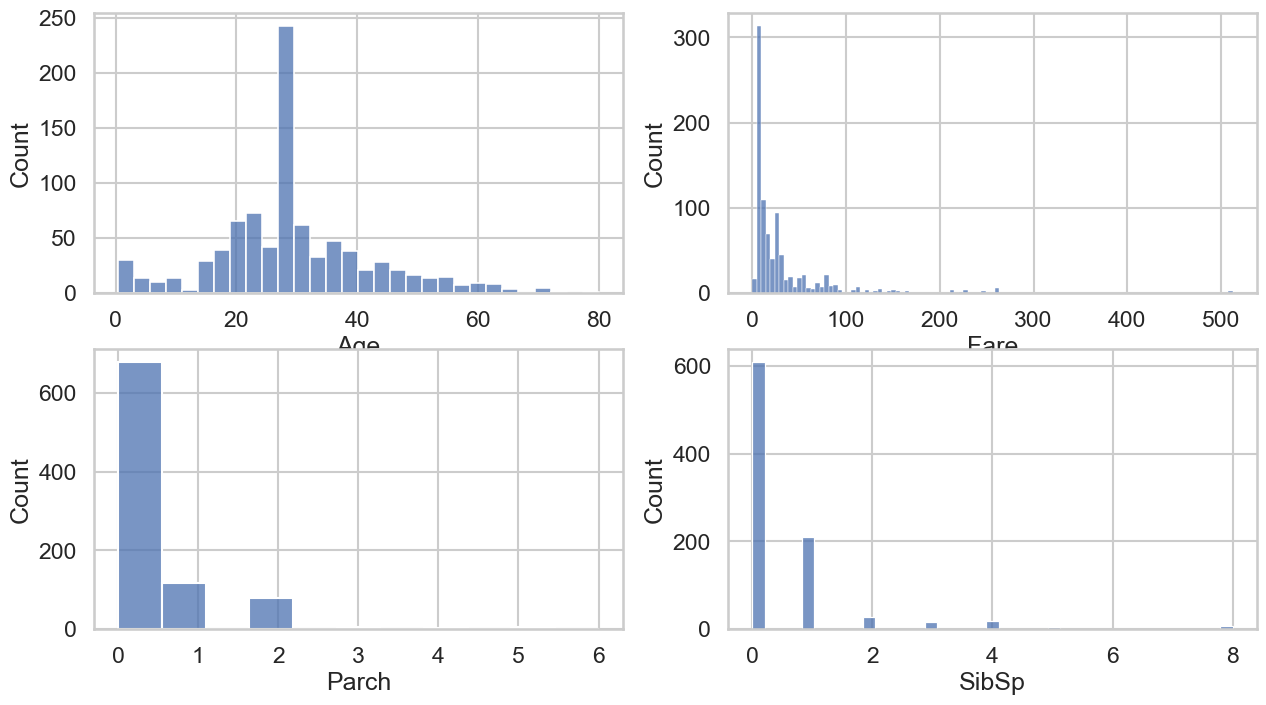

In [71]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 8))
sns.histplot(data = df, x = 'Age',  ax = ax1)
sns.histplot(data = df, x = 'Fare', ax = ax2)
sns.histplot(data = df, x = 'Parch', ax = ax3)
sns.histplot(data = df, x = 'SibSp', ax = ax4)

Ваші висновки:

Діаграми дають зрозуміти розподіл всіх числових змінних.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:

1. побудувати графіки співвідношення між всіма числовими змінними.
2. описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

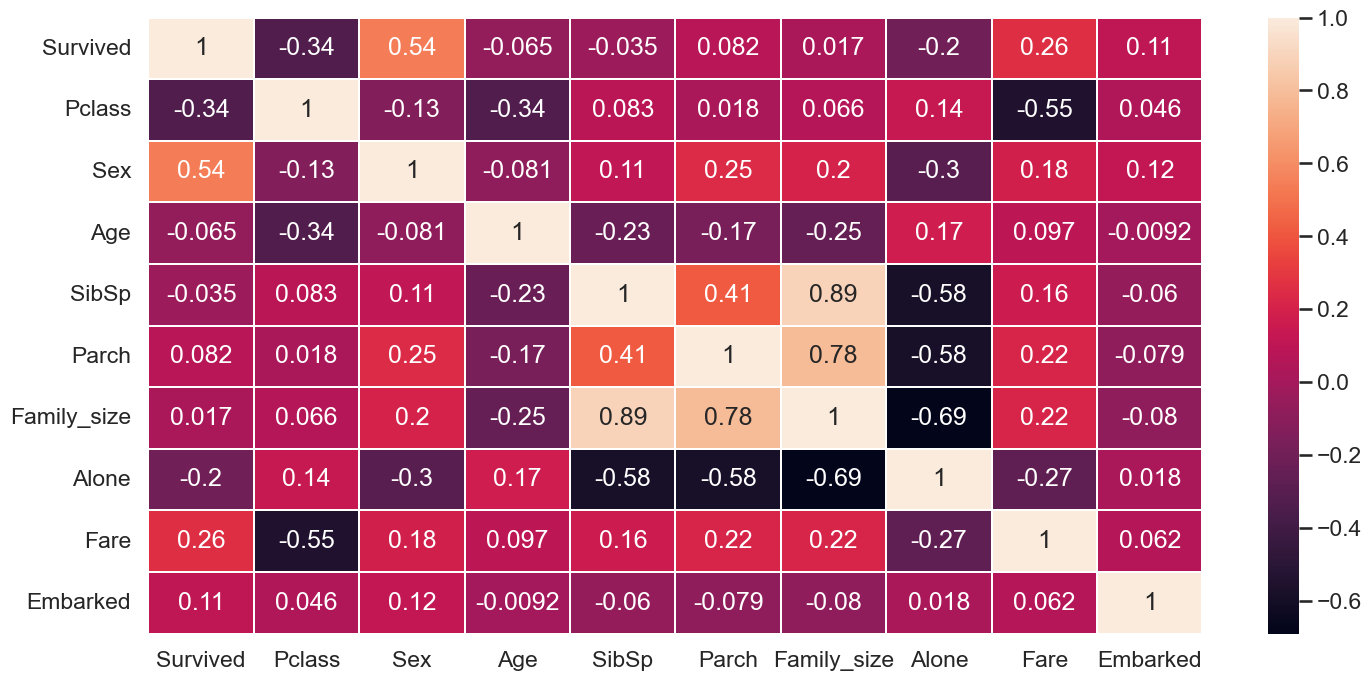

In [37]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=0.3)
plt.show()

Ваші висновки:

Дана візуалізація дає можливість побачити найбільш залежні одне від одного значення: Family_size та SibSp - 0.89; Family_size та Parch - 0.78; Sex та Survived - 0.54; Parch та SibSp - 0.41. 
Найменше залежать один від одного Alone та Family_size - (-0.69); Alone та Parch та SibSp - (-0.58); Fare та Pclass - (-0.55).

Кожне правильно виконане завдання буде оцінюватись в ```1 бали```.